In [1]:
# Import package
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import normaltest, kstest
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import data
df = pd.read_csv('pineapple_juice.csv')

# Check data
print(df.head())
print(df.shape)


   day  pineapple_juice  price
0    1              131   1.38
1    2              147   1.06
2    3              101   1.98
3    4              139   1.22
4    5              121   1.58
(366, 3)


In [2]:
# Determine the array for testing
demand = np.array(df['pineapple_juice'])

# Normality test using normal test
print(f'''Normality test using normal test: {st.normaltest(demand)}''')


# Normality test using Kolmogorov-Smirnov test
print(f'''Normality test using Kolmogorov-Smirnov test: {st.kstest(demand, 'norm', args=(demand.mean(), demand.std()))}''')

Normality test using normal test: NormaltestResult(statistic=np.float64(0.21138861192573508), pvalue=np.float64(0.8996996388570704))
Normality test using Kolmogorov-Smirnov test: KstestResult(statistic=np.float64(0.03041961698323714), pvalue=np.float64(0.8767570617996495), statistic_location=np.int64(131), statistic_sign=np.int8(1))


Coefficient: -50.0
Intercept: 200.0


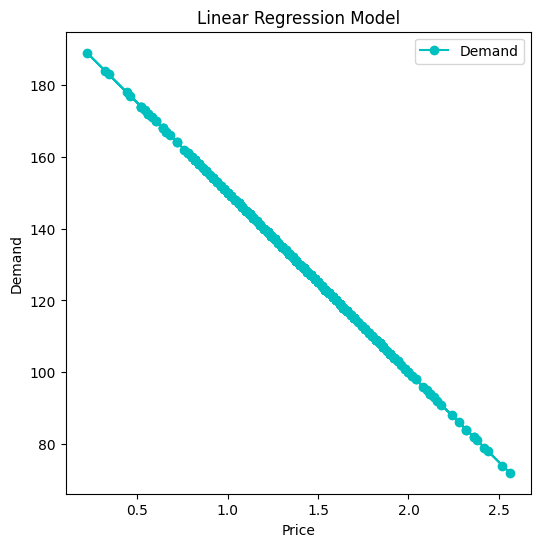

In [3]:
# Linear regression model

# Prepare the data
X = np.array(df['price']).reshape(-1,1)
Y = np.array(df['pineapple_juice'])

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X, Y)

# Get the coefficient and intercept
print(f'''Coefficient: {model.coef_[0]}
Intercept: {model.intercept_}''')

# Plot the model
plt.subplots(figsize=(6, 6))
plt.plot(X, Y, marker = 'o', c = 'c', linestyle = '-')
plt.title('Linear Regression Model')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.legend(['Demand'])
plt.show()